___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [461]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [462]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [463]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [464]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [466]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [467]:
df.duplicated().sum()

0

In [468]:
df_copy = df.copy()

### Data Wrangling

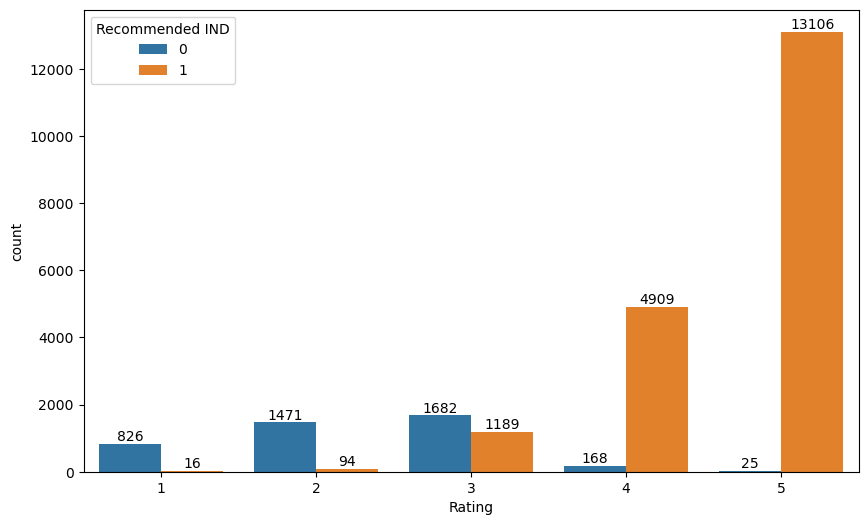

In [469]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#### Check Proportion of Target Class Variable:

In [470]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [471]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

[Text(0, 0, '4172'), Text(0, 0, '19314')]

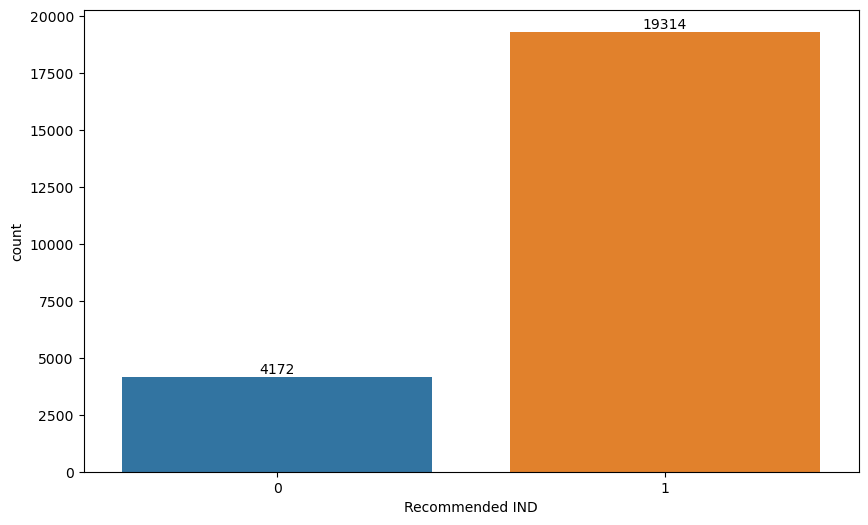

In [472]:
ax = sns.countplot(data = df, x = "Recommended IND")
ax.bar_label(ax.containers[0])

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [473]:
df = df[["Review Text", "Recommended IND"]]

In [474]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [475]:
df.rename(columns={"Review Text": "Review_Text", "Recommended IND": "Recommended_IND"}, inplace=True)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [477]:
# Changing target label value as 1

df.Recommended_IND = df.Recommended_IND.map({1:0, 0:1})

In [478]:
df.Recommended_IND.value_counts()

0    19314
1     4172
Name: Recommended_IND, dtype: int64

In [479]:
df.Recommended_IND.value_counts(normalize=True)

0    0.822362
1    0.177638
Name: Recommended_IND, dtype: float64

### Missing Value Detection

In [480]:
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [481]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [482]:
df.isnull().sum()

Review_Text        0
Recommended_IND    0
dtype: int64

In [484]:
df.Recommended_IND.value_counts(normalize=True)

0    0.818868
1    0.181132
Name: Recommended_IND, dtype: float64

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.9+ KB


In [486]:
df_copy = df.copy()

In [487]:
df_copy.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [270]:
df.Review_Text[850]

'I loved the photo of this dress. upon examination of the dress (and trying it on) after receiving in the mail, the dress shown online is nothing like the dress i received save for the pattern. the dress i received has a side zip as well as a belt and no pleats on the top. the bottom is also cut straight across not as it appears in the photo. turns out it is not as flattering as it should appear.'

In [271]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [272]:
def cleaning(data):
   
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #2. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #3. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [273]:
df["Review_Text"] = df["Review_Text"].apply(cleaning)
df["Review_Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [274]:
df_positive = df[df.Recommended_IND == 1]
df_positive.head()

,Review_Text,Recommended_IND
2,high hope dress really wanted work initially o...,1
5,love tracy reese dress one not petite foot tal...,1
10,dress run small esp zipper area run ordered sp...,1
22,first not pullover styling side zipper wouldnt...,1
25,loved material didnt really look long dress pu...,1


In [275]:
df_negative = df[df.Recommended_IND == 0]
df_negative.head()

,Review_Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0
6,aded basket hte last mintue see would look lik...,0


### Collect Words (positive and negative separately)

In [276]:
positive_words = " ".join(df_positive.Review_Text)
positive_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

In [277]:
negative_words = " ".join(df_negative.Review_Text)
negative_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [516]:
# pip install wordcloud

In [278]:
from wordcloud import WordCloud

In [279]:
worldcloud = WordCloud(background_color="black", max_words =250, colormap=plt.cm.hsv)

In [280]:
worldcloud.generate(positive_words)

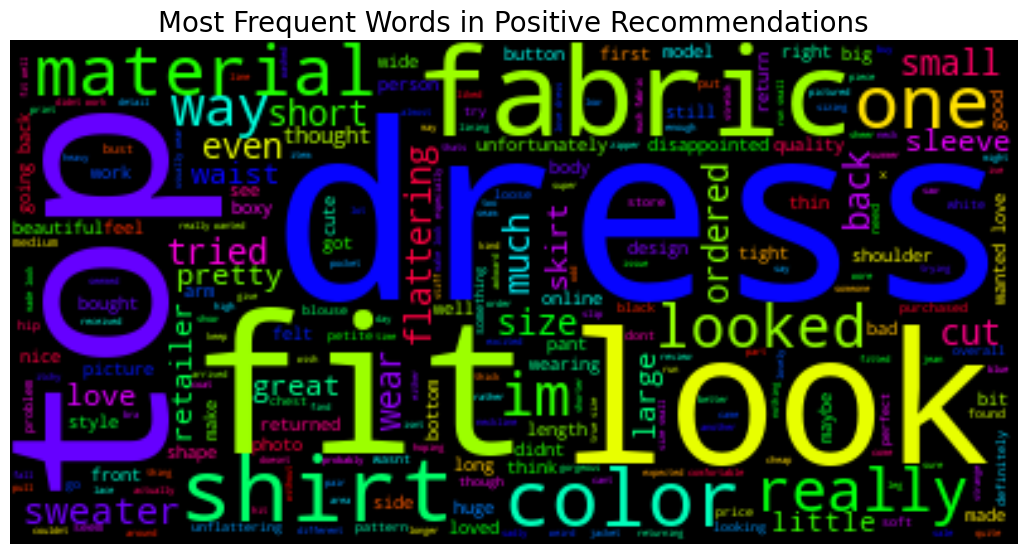

In [281]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.title("Most Frequent Words in Positive Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

In [282]:
worldcloud.generate(negative_words)

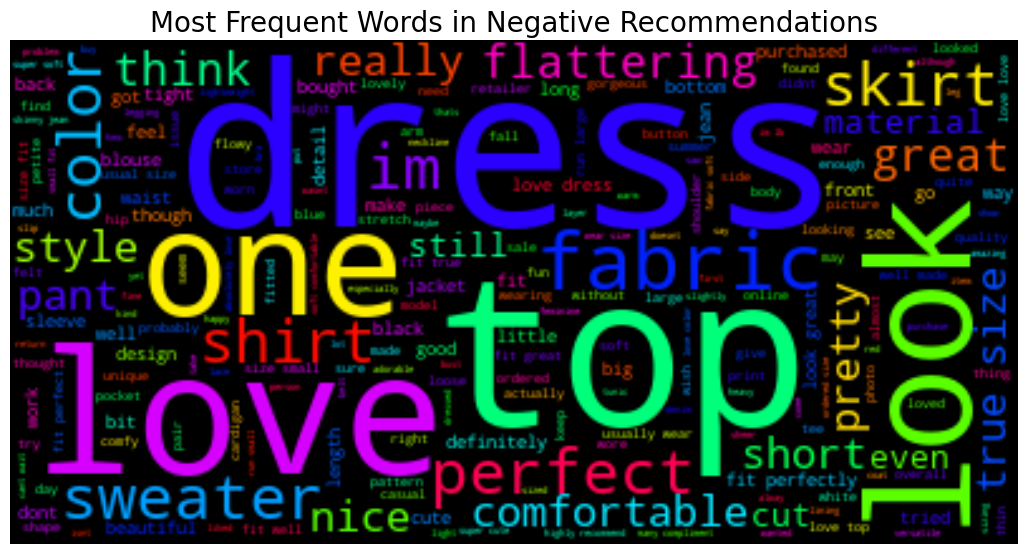

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.title("Most Frequent Words in Negative Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X = df["Review_Text"]
y= df["Recommended_IND"]

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

In [287]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [289]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### Count Vectorization

In [290]:
from sklearn.feature_extraction.text import CountVectorizer

In [291]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [292]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [293]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20374,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [295]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)            
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

## Logistic Regression

### CountVectorizer

In [296]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [297]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1653  202]
 [  82  328]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1855
           1       0.62      0.80      0.70       410

    accuracy                           0.87      2265
   macro avg       0.79      0.85      0.81      2265
weighted avg       0.89      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16685
           1       0.73      0.96      0.83      3691

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [313]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None),
#             'recall-neg': make_scorer(recall_score, average=None),
#             'f1-neg': make_scorer(f1_score, average=None)}

In [315]:
# Cross Validation

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.607573
train_precision    0.734620
test_recall        0.789492
train_recall       0.967338
test_f1            0.686448
train_f1           0.835065
test_accuracy      0.869356
train_accuracy     0.930779
dtype: float64

In [316]:
# Logistic Model with C=0.01

log = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [318]:
print("LOG MODEL with C=0.01")
eval(log, X_train_count, X_test_count)

LOG MODEL with C=0.01
[[1581  274]
 [  64  346]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1855
           1       0.56      0.84      0.67       410

    accuracy                           0.85      2265
   macro avg       0.76      0.85      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16685
           1       0.58      0.88      0.70      3691

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [319]:
# Cross Validation with C=0.01

model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.554106
train_precision    0.575180
test_recall        0.849363
train_recall       0.883380
test_f1            0.670597
train_f1           0.696717
test_accuracy      0.848842
train_accuracy     0.860686
dtype: float64

In [320]:
from sklearn.metrics import PrecisionRecallDisplay

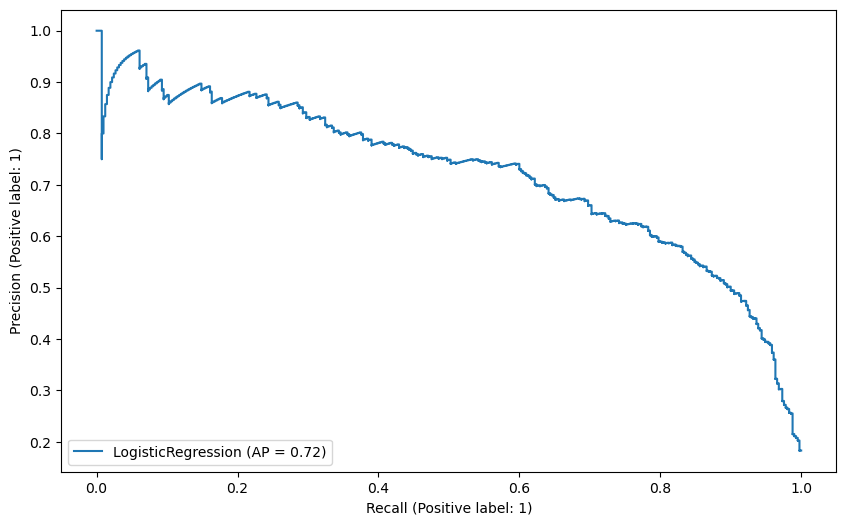

In [322]:
model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
model.fit(X_train_count, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

### TF-IDF

In [323]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [324]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1609  246]
 [  60  350]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1855
           1       0.59      0.85      0.70       410

    accuracy                           0.86      2265
   macro avg       0.78      0.86      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     16685
           1       0.64      0.93      0.76      3691

    accuracy                           0.89     20376
   macro avg       0.81      0.90      0.84     20376
weighted avg       0.92      0.89      0.90     20376



In [325]:
# Cross Validation

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.592765
train_precision    0.639967
test_recall        0.851803
train_recall       0.927602
test_f1            0.698920
train_f1           0.757393
test_accuracy      0.867049
train_accuracy     0.892352
dtype: float64

In [326]:
# Cross Validation with C=0.1

model = LogisticRegression(C= 0.1, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.552917
train_precision    0.568957
test_recall        0.864269
train_recall       0.892471
test_f1            0.674282
train_f1           0.694905
test_accuracy      0.848694
train_accuracy     0.858041
dtype: float64

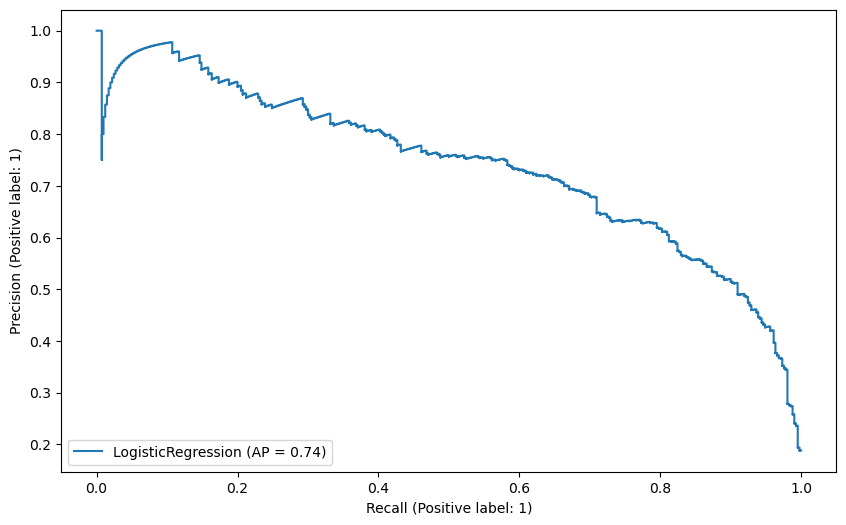

In [328]:
model = LogisticRegression(C=0.1, max_iter=1000, class_weight='balanced', random_state=101)
model.fit(X_train_tf_idf,y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=1)
plt.show()

## Naive Bayes 

### Countvectorizer

In [329]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.76022758, 2.76022758, 0.61060833, ..., 0.61060833, 0.61060833,
       0.61060833])

In [330]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [331]:
nb = MultinomialNB(alpha=1)  # test datasında train datasındaki unique datası arasında olmadığı zaman olasılık değerini sıfıra çeker.
                            # Bunu önlemek için bütün olasılık hesaplarını alfayı kullanarak düzenler.
                            # alfayı paya ekleyerek, paydaya da total olumlu/olumsuz sayısı ile alfayı çarpıp ekleyerek düzenlemeyi yapar.
                            # Aynı zamanda naive bayes için bir overfitting parametresidir. Bu değeri ayarlayarak overfitting'e gitme durumlarını çözebiliriz.
nb.fit(X_train_count, y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [332]:
print("NB MODEL with CountVectorizer")
eval(nb, X_train_count, X_test_count)

NB MODEL with CountVectorizer
[[1586  269]
 [  53  357]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1855
           1       0.57      0.87      0.69       410

    accuracy                           0.86      2265
   macro avg       0.77      0.86      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     16685
           1       0.61      0.91      0.73      3691

    accuracy                           0.88     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.88      0.89     20376



In [333]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.573209
train_precision    0.608333
test_recall        0.856416
train_recall       0.914477
test_f1            0.686646
train_f1           0.730629
test_accuracy      0.858363
train_accuracy     0.877852
dtype: float64

In [336]:
# cross validation  with alpha=10

model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.557855
train_precision    0.578800
test_recall        0.872668
train_recall       0.906620
test_f1            0.680546
train_f1           0.706535
test_accuracy      0.851590
train_accuracy     0.863570
dtype: float64

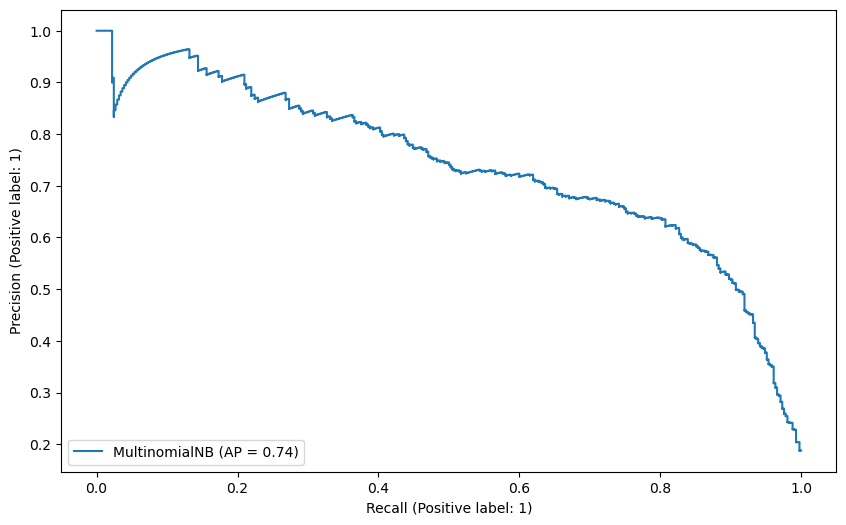

In [337]:
model = MultinomialNB(alpha=10)
model.fit(X_train_count, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

### TF-IDF

In [338]:
nb = MultinomialNB(alpha=1)  # test datasında train datasındaki unique datası arasında olmadığı zaman olasılık değerini sıfıra çeker.
                            # Bunu önlemek için bütün olasılık hesaplarını alfayı kullanarak düzenler.
                            # alfayı paya ekleyerek, paydaya da total olumlu/olumsuz sayısı ile alfayı çarpıp ekleyerek düzenlemeyi yapar.
                            # Aynı zamanda naive bayes için bir overfitting parametresidir. Bu değeri ayarlayarak overfitting'e gitme durumlarını çözebiliriz.
nb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [339]:
print("NB MODEL with CountVectorizer")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL with CountVectorizer
[[1572  283]
 [  51  359]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1855
           1       0.56      0.88      0.68       410

    accuracy                           0.85      2265
   macro avg       0.76      0.86      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     16685
           1       0.59      0.92      0.72      3691

    accuracy                           0.87     20376
   macro avg       0.78      0.89      0.82     20376
weighted avg       0.91      0.87      0.88     20376



In [340]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.559323
train_precision    0.593929
test_recall        0.864814
train_recall       0.918480
test_f1            0.679154
train_f1           0.721379
test_accuracy      0.851933
train_accuracy     0.871477
dtype: float64

In [342]:
# cross validation with alpha=10

model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.545759
train_precision    0.564449
test_recall        0.880526
train_recall       0.909961
test_f1            0.673771
train_f1           0.696718
test_accuracy      0.845504
train_accuracy     0.856492
dtype: float64

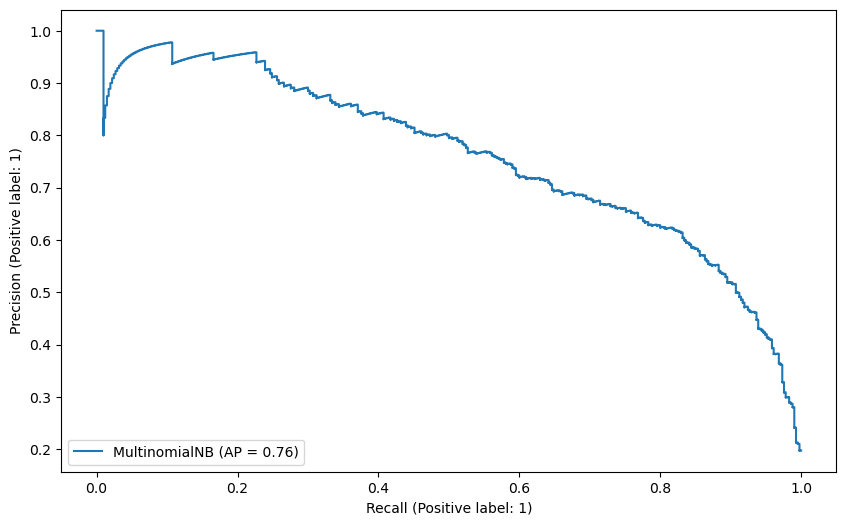

In [344]:
model = MultinomialNB(alpha=10)
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=1)
plt.show()

## Support Vector Machine (SVM)

### Countvectorizer

In [345]:
from sklearn.svm import LinearSVC  # daha az maliyetli olduğu için linearSVC tercih edildi.
svc = LinearSVC(class_weight="balanced")
svc.fit(X_train_count,y_train)

LinearSVC(class_weight='balanced')

In [346]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1651  204]
 [ 105  305]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1855
           1       0.60      0.74      0.66       410

    accuracy                           0.86      2265
   macro avg       0.77      0.82      0.79      2265
weighted avg       0.88      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16685
           1       0.81      0.98      0.89      3691

    accuracy                           0.95     20376
   macro avg       0.90      0.96      0.93     20376
weighted avg       0.96      0.95      0.96     20376



In [347]:
model = LinearSVC(class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.580982
train_precision    0.825089
test_recall        0.704970
train_recall       0.983955
test_f1            0.636765
train_f1           0.897542
test_accuracy      0.854387
train_accuracy     0.959304
dtype: float64

In [355]:
# cross validation with C=0.001 

model = LinearSVC(C=0.001, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.553761
train_precision    0.575577
test_recall        0.851532
train_recall       0.886691
test_f1            0.671016
train_f1           0.698036
test_accuracy      0.848744
train_accuracy     0.861035
dtype: float64

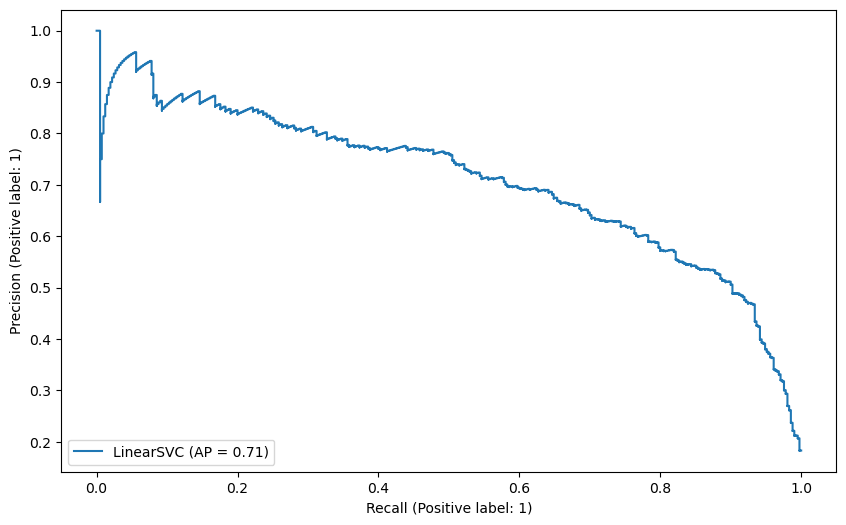

In [356]:
model = LinearSVC(C=0.001, class_weight="balanced")
model.fit(X_train_count, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

### TD-IDF

In [357]:
from sklearn.svm import LinearSVC  # daha az maliyetli olduğu için linearSVC tercih edildi.
svc = LinearSVC(class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(class_weight='balanced')

In [358]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1632  223]
 [  76  334]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1855
           1       0.60      0.81      0.69       410

    accuracy                           0.87      2265
   macro avg       0.78      0.85      0.80      2265
weighted avg       0.89      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16685
           1       0.72      0.97      0.83      3691

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [359]:
model = LinearSVC(class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.604945
train_precision    0.725171
test_recall        0.799783
train_recall       0.971673
test_f1            0.688623
train_f1           0.830512
test_accuracy      0.869013
train_accuracy     0.928156
dtype: float64

In [366]:
# cross validation with C=0.01

model = LinearSVC(C=0.01, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.548936
train_precision    0.565584
test_recall        0.868874
train_recall       0.896114
test_f1            0.672714
train_f1           0.693476
test_accuracy      0.846780
train_accuracy     0.856498
dtype: float64

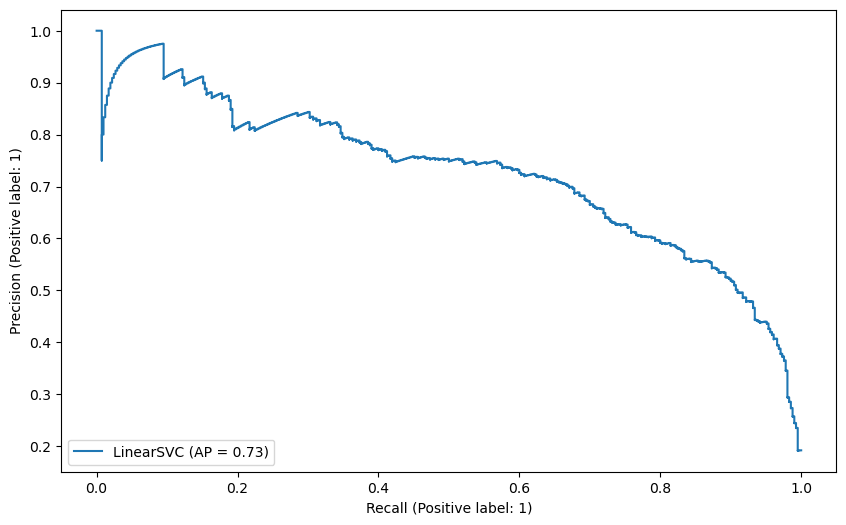

In [367]:
model = LinearSVC(C=0.01, class_weight="balanced")
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=1)
plt.show()

## Random Forest

### Countvectorizer

In [368]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 10, class_weight="balanced", random_state = 101, n_jobs = -1)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [369]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1583  272]
 [  81  329]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1855
           1       0.55      0.80      0.65       410

    accuracy                           0.84      2265
   macro avg       0.75      0.83      0.78      2265
weighted avg       0.88      0.84      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     16685
           1       0.60      0.88      0.71      3691

    accuracy                           0.87     20376
   macro avg       0.78      0.87      0.81     20376
weighted avg       0.90      0.87      0.88     20376



In [372]:
model = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.514194
train_precision    0.539390
test_recall        0.802219
train_recall       0.845510
test_f1            0.626456
train_f1           0.658527
test_accuracy      0.826708
train_accuracy     0.841098
dtype: float64

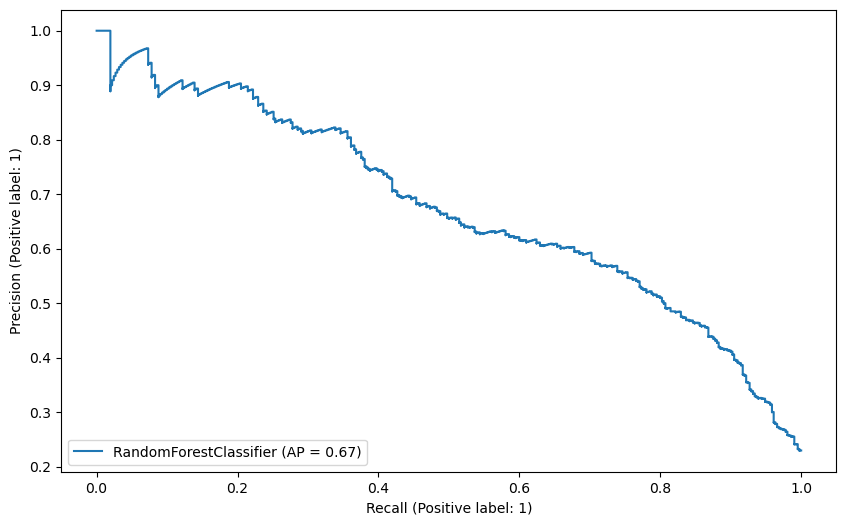

In [376]:
model = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1)
model.fit(X_train_count, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

### TF-IDF

In [377]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 10, class_weight="balanced", random_state = 101, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [378]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1571  284]
 [  82  328]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1855
           1       0.54      0.80      0.64       410

    accuracy                           0.84      2265
   macro avg       0.74      0.82      0.77      2265
weighted avg       0.88      0.84      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     16685
           1       0.60      0.89      0.72      3691

    accuracy                           0.87     20376
   macro avg       0.79      0.88      0.82     20376
weighted avg       0.90      0.87      0.88     20376



In [379]:
model = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.490700
train_precision    0.517044
test_recall        0.810077
train_recall       0.854902
test_f1            0.610891
train_f1           0.644208
test_accuracy      0.813016
train_accuracy     0.828840
dtype: float64

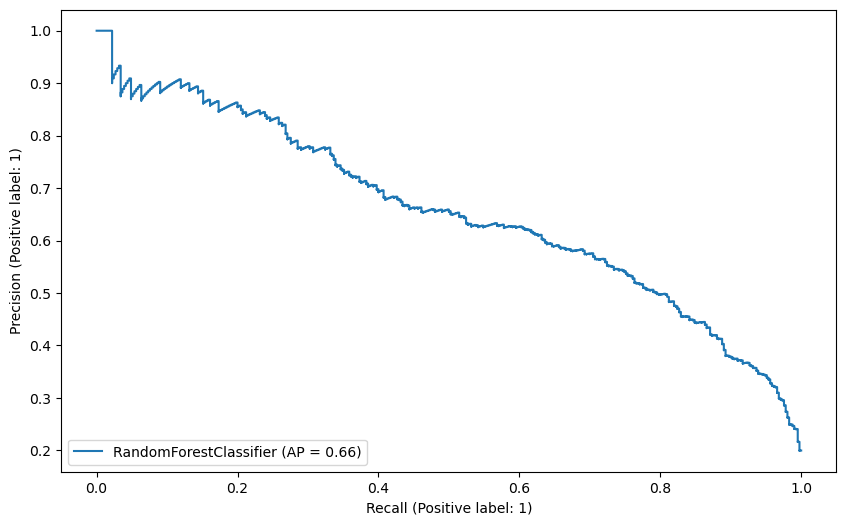

In [381]:
model = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 101, n_jobs = -1)
model.fit(X_train_tf_idf, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=1)
plt.show()

## Ada Boosting

### Countvectorizer

In [382]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [383]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1562  293]
 [  95  315]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1855
           1       0.52      0.77      0.62       410

    accuracy                           0.83      2265
   macro avg       0.73      0.81      0.75      2265
weighted avg       0.87      0.83      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.89     16685
           1       0.51      0.78      0.62      3691

    accuracy                           0.82     20376
   macro avg       0.73      0.81      0.75     20376
weighted avg       0.87      0.82      0.84     20376



In [384]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.496929
train_precision    0.506349
test_recall        0.769708
train_recall       0.782926
test_f1            0.603719
train_f1           0.614961
test_accuracy      0.816893
train_accuracy     0.822400
dtype: float64

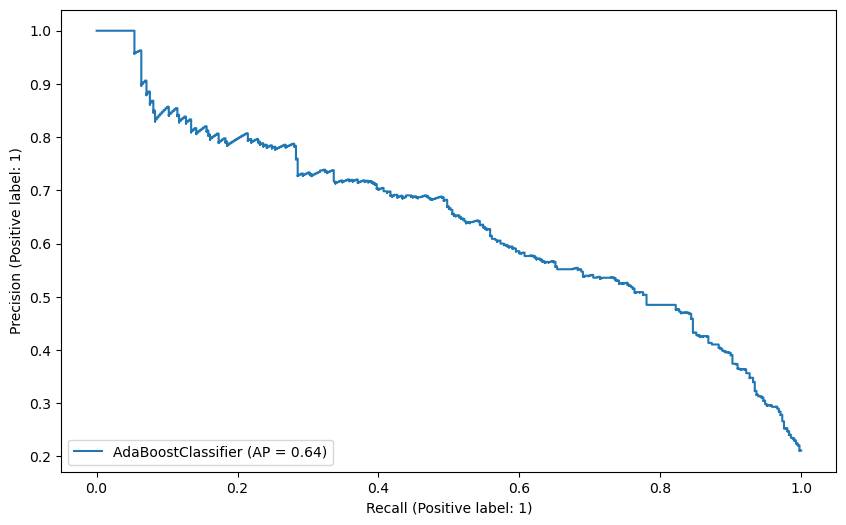

In [386]:
model = AdaBoostClassifier(random_state = 101)
model.fit(X_train_count, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

### TF-IDF

In [387]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [388]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1523  332]
 [ 105  305]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1855
           1       0.48      0.74      0.58       410

    accuracy                           0.81      2265
   macro avg       0.71      0.78      0.73      2265
weighted avg       0.85      0.81      0.82      2265

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     16685
           1       0.50      0.79      0.61      3691

    accuracy                           0.82     20376
   macro avg       0.72      0.81      0.75     20376
weighted avg       0.87      0.82      0.83     20376



In [389]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.483321
train_precision    0.495765
test_recall        0.774313
train_recall       0.796441
test_f1            0.594817
train_f1           0.610690
test_accuracy      0.808746
train_accuracy     0.815851
dtype: float64

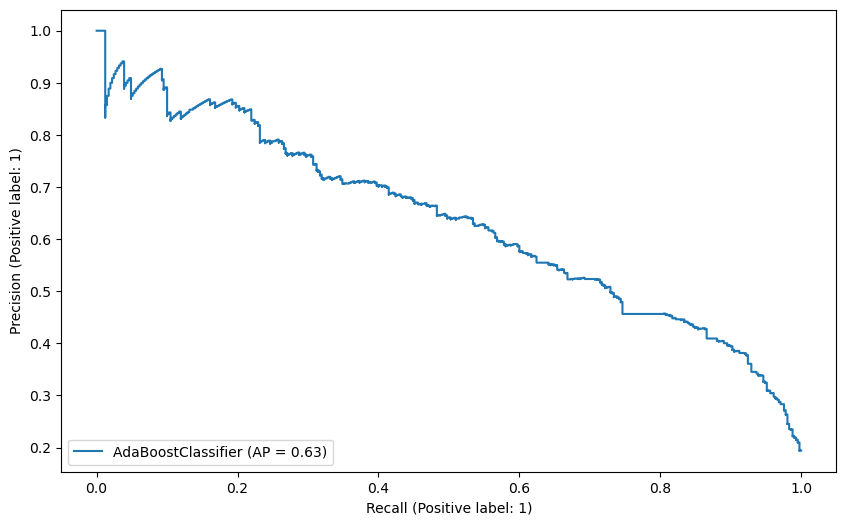

In [391]:
model = AdaBoostClassifier(random_state = 101)
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(ada, X_test_tf_idf, y_test, pos_label=1)
plt.show()

## DL modeling

In [392]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [488]:
X = df_copy["Review_Text"]
y = df_copy["Recommended_IND"]

### Tokenization

In [489]:
tokenizer = Tokenizer() # as we have small data we didn't use num_words parameter

tokenizer.fit_on_texts(X)

### Creating word index

In [490]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [491]:
# to see the number of unique tokens

len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [492]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [493]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


In [494]:
X[77]

"The zipper broke on this piece the first time i wore it. very disappointing since i love the design. i'm actually going to try to replace the zipper myself with something stronger, but annoying that it's come to that."

In [495]:
print(X_num_tokens[77])

[1, 469, 2021, 11, 7, 198, 1, 171, 183, 2, 227, 5, 23, 950, 235, 2, 21, 1, 142, 36, 291, 176, 8, 179, 8, 2626, 1, 469, 573, 14, 294, 5106, 10, 2048, 20, 33, 484, 8, 20]


### Maximum number of tokens for all documents¶

In [496]:
# DL modellerinde modele verdiğimiz datamızın aynı boyutta olması gerekiyor.

len(X_num_tokens[77])

39

In [497]:
X[106]

'Perfect dress for hot, humid, sticky weather.'

In [498]:
print(X_num_tokens[106])

[54, 18, 12, 495, 2088, 2955, 452]


In [499]:
len(X_num_tokens[106])

7

In [500]:
len(X_num_tokens[7])

97

In [501]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [502]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [503]:
num_tokens.mean()

60.60699615741354

In [504]:
num_tokens.max()

116

In [505]:
num_tokens.argmax() 

16263

In [506]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [508]:
len(X_num_tokens[16263])

116

In [510]:
max_tokens = 103

In [511]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9564948544675589

In [512]:
sum(num_tokens < max_tokens)

21656

In [513]:
len(num_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [514]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [515]:
X_pad.shape

(22641, 103)

In [516]:
np.array(X_num_tokens[800])

array([   5,    6,   16,  548,   10,  676,    3,   73,    2,   38,  384,
          3,  659, 1077,    3,  285,   46,   78,   31,  150])

In [517]:
len(np.array(X_num_tokens[800]))

20

In [518]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    5,    6,   16,  548,   10,
        676,    3,   73,    2,   38,  384,    3,  659, 1077,    3,  285,
         46,   78,   31,  150])

In [521]:
np.array(X_num_tokens[16263])

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

In [522]:
X_pad[16263]

array([  74,    2,  196,    1,  447,  218,   20,  364,   62,    2,  516,
          8,   17,  494,  106,    8,  179,   56,   11,   36,  107,    4,
         79,    9,    4,   25,  425,    9,    4,  247,   60,  418,   42,
        117,   65,    4,   79,    8,  179,   16,    2,  104,    5,    9,
          1,  123,  791,    2,  118,  778,  115,    1,   25,   11,    5,
        157,   28,    2,   15, 1609,  504,  160,   13,    1,   25,    2,
       4114, 1777,    1,   22,    3,    5,   15,    4,   79,   33,    4,
       1376,    1,   25,    6,   51,   69,   49,   40,   27,    1,  502,
         77,  652,   37,  583,  147,   43,    4,   22,   37,  262,   49,
         40,   27,  107,    4])

In [532]:
len(X_num_tokens)

22641

### Train Test Split

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=0)

### Modeling

In [534]:
embedding_size = 50

In [618]:
model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index)+1,  # input olarak yukarıda belirlediğimiz en fazla geçen 15000 token kullanılacak.
                    output_dim=embedding_size, # embedding layer kendisine gelen 15000 tokeni word embeddinge dönüştürecek ve 50 boyutlu word embedding oluşturacak. 
                    input_length=max_tokens))  # input size larını sabitlemek için yukarıda belirlediğimiz max_tokens i kullanacak

model.add(Dropout(0.5))

model.add(GRU(units=48, return_sequences=True)) # return_sequences :True olduğunda bütün t anlarındaki hidden state bilgilerini bir sonraki LSTM veya GRU layer'e gönderiyor. bunu dense layer'a kadarki bütün LSTM/GRU layerlarında kullanmalıyız.
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(units=12))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# NLP DL modellerinde layer sayısının 5'ten fazla olması tavsiye edilmez. 
# Layer fazla olduğunda da overfitting olabilir. Bu durumda da layer sayısı azaltılabilir.

In [619]:
optimizer = Adam(learning_rate=0.005)

In [620]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [621]:
model.summary() 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 103, 50)           742400    
                                                                 
 dropout_38 (Dropout)        (None, 103, 50)           0         
                                                                 
 gru_42 (GRU)                (None, 103, 48)           14400     
                                                                 
 dropout_39 (Dropout)        (None, 103, 48)           0         
                                                                 
 gru_43 (GRU)                (None, 103, 24)           5328      
                                                                 
 dropout_40 (Dropout)        (None, 103, 24)           0         
                                                                 
 gru_44 (GRU)                (None, 12)              

In [622]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",  # NLP modellleri için recall ve precision için mode=max, loss için mode=min kullanılmalıdır.
                           verbose=1, patience = 1, restore_best_weights=True)

In [623]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [624]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight= classes_weights,  # batch size ın küçük olması çoğunlukla eğitimin daha iyi olmasını sağlar. Bu nedenle overfittingi gidermek için büyük batch size lar kullanabilirsiniz.
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 22s 114ms/step - loss: 0.4900 - recall: 0.7862 - val_loss: 0.3289 - val_recall: 0.8488
Epoch 2/10
160/160 [==============================] - 17s 108ms/step - loss: 0.3263 - recall: 0.8922 - val_loss: 0.3286 - val_recall: 0.8951
Epoch 3/10
160/160 [==============================] - 19s 117ms/step - loss: 0.2592 - recall: 0.9325 - val_loss: 0.3030 - val_recall: 0.7902
Epoch 3: early stopping


In [625]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.490013,0.786237,0.328875,0.848781
1,0.326335,0.892170,0.328599,0.895122
2,0.259206,0.932539,0.303012,0.790244


<AxesSubplot:>

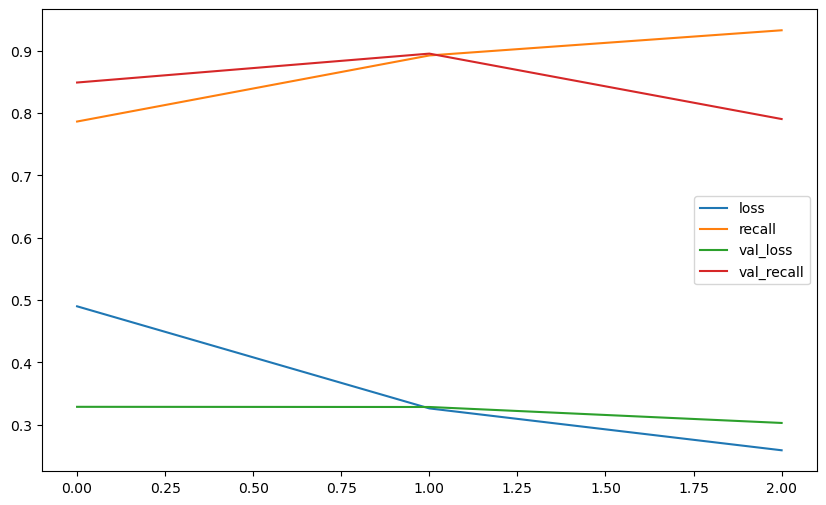

In [626]:
model_loss.plot()

In [627]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 13ms/step - loss: 0.3286 - recall: 0.8951


[0.32859840989112854, 0.8951219320297241]

In [628]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 8s 13ms/step - loss: 0.2443 - recall: 0.9642


[0.24427412450313568, 0.9642373323440552]

In [629]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5
y_train_pred = model.predict(X_train) >= 0.5

print("Test Result")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("###"*20)
print("Train Result")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 8s 13ms/step
Test Result
[[1565  290]
 [  43  367]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1855
           1       0.56      0.90      0.69       410

    accuracy                           0.85      2265
   macro avg       0.77      0.87      0.80      2265
weighted avg       0.90      0.85      0.86      2265

############################################################
Train Result
[[14832  1853]
 [  132  3559]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16685
           1       0.66      0.96      0.78      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.93      0.86     20376
weighted avg       0.93      0.90      0.91     20376



71/71 [==============================] - 1s 13ms/step


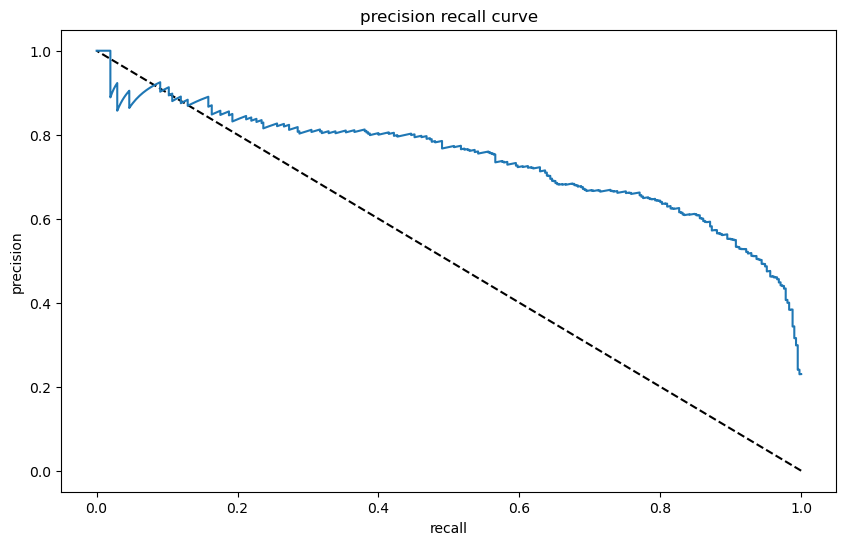

In [630]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [631]:
average_precision_score(y_test, y_pred_proba)

0.7390091115550753

71/71 [==============================] - 1s 13ms/step


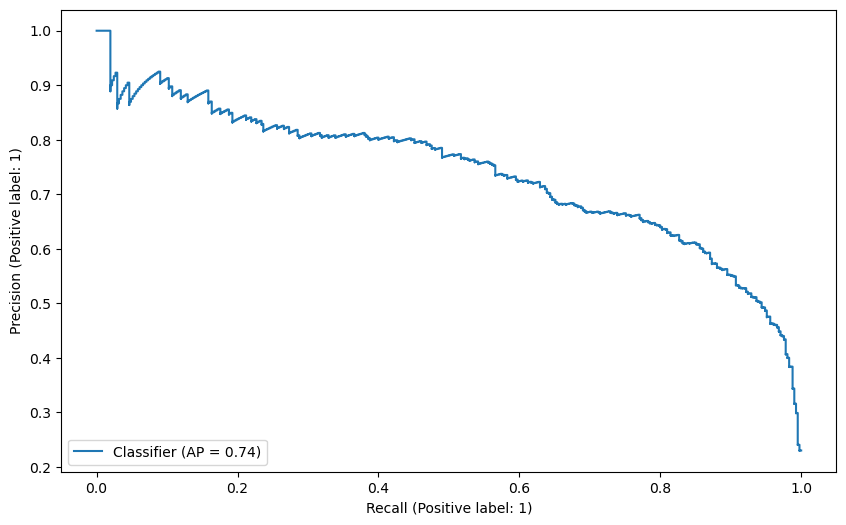

In [632]:
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

In [596]:
# Saving the model

model.save('model2_sentiment.h5')

model1_sentiment.h5 results:
learning_rate=0.001

Test Result
[[1557  298]
[  52  358]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1855
           1       0.55      0.87      0.67       410

    accuracy                           0.85      2265
   macro avg       0.76      0.86      0.79      2265
weighted avg       0.89      0.85      0.86      2265

############################################################
Train Result
[[14743  1942]
[  127  3564]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16685
           1       0.65      0.97      0.78      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.92      0.85     20376
weighted avg       0.93      0.90      0.91     20376


model2_sentiment.h5 results:
learning_rate=0.005

Test Result
[[1490  365]
 [  28  382]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1855
           1       0.51      0.93      0.66       410

    accuracy                           0.83      2265
   macro avg       0.75      0.87      0.77      2265
weighted avg       0.90      0.83      0.84      2265

############################################################
Train Result
[[14256  2429]
 [   93  3598]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     16685
           1       0.60      0.97      0.74      3691

    accuracy                           0.88     20376
   macro avg       0.80      0.91      0.83     20376
weighted avg       0.92      0.88      0.89     20376

## BERT Modeling

### Tokenization

### Train test split

### Transformation text to tensor

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___